# Exploring further the dataset

We look at the features and their distribution to understand better the dataset

In [120]:
## Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Feature Data
filename = "features.csv"
output_data = "../../data/output" 
filepath = os.path.join(output_data,filename)

data = pd.read_csv(filepath,index_col=False, header=0)
original_count = len(data)
print(original_count)
data.head()

339


,Solar,Energy,year,Price,REDTI,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2.965,2018.869,1990,7.17,8.8,1,0,0,0,0,0,0,0,0,0,0,0
1,3.196,1640.310,1990,7.48,22.7,0,1,0,0,0,0,0,0,0,0,0,0
2,4.403,1559.289,1990,7.57,29.8,0,0,1,0,0,0,0,0,0,0,0,0
3,4.853,1299.971,1990,7.69,26.8,0,0,0,1,0,0,0,0,0,0,0,0
4,5.357,1143.417,1990,7.96,53.9,0,0,0,0,1,0,0,0,0,0,0,0


## Support function lag_data for augmenting the dataset to include seriability

We create additional columns to show the previous values (lag)

We use a window of 12 months to get the value for the same month of previous year

In [121]:
#d1 = data.iloc[lag_count:-1*lag_count]
#d2 = data.iloc[lag_count:]
print(len(data))
last_row = data.tail(1)
last_row
#print(len(d2))
# difference_merge = pd.merge(d1,d2,how="outer", indicator="true")
# difference_merge.loc[difference_merge["true"] != "both"]

339


,Solar,Energy,year,Price,REDTI,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
338,18.047,1884.175,2018,12.99,50.2,0,0,1,0,0,0,0,0,0,0,0,0


In [122]:
# Propagate last value:
# add dummy rows that will perserve the value for the last observation, this is repeat the last observation

newdata = data.copy()
lag_count=12
for i in range(1, lag_count+1):
    newdata = newdata.append(last_row)
print(len(newdata))
newdata.tail(12)

351


,Solar,Energy,year,Price,REDTI,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
338,18.047,1884.175,2018,12.99,50.2,0,0,1,0,0,0,0,0,0,0,0,0
338,18.047,1884.175,2018,12.99,50.2,0,0,1,0,0,0,0,0,0,0,0,0
338,18.047,1884.175,2018,12.99,50.2,0,0,1,0,0,0,0,0,0,0,0,0
338,18.047,1884.175,2018,12.99,50.2,0,0,1,0,0,0,0,0,0,0,0,0
338,18.047,1884.175,2018,12.99,50.2,0,0,1,0,0,0,0,0,0,0,0,0
338,18.047,1884.175,2018,12.99,50.2,0,0,1,0,0,0,0,0,0,0,0,0
338,18.047,1884.175,2018,12.99,50.2,0,0,1,0,0,0,0,0,0,0,0,0
338,18.047,1884.175,2018,12.99,50.2,0,0,1,0,0,0,0,0,0,0,0,0
338,18.047,1884.175,2018,12.99,50.2,0,0,1,0,0,0,0,0,0,0,0,0
338,18.047,1884.175,2018,12.99,50.2,0,0,1,0,0,0,0,0,0,0,0,0


In [123]:


def lag_data(lag_count, df):
    features = []
    targets = []
    for i in range(1, lag_count+1):
        df['lag%s' % i] = df.Solar.shift(i)
        df['peek%s' % i] = df.Solar.shift(-1*i)
        features.append('lag%s' % i)
        targets.append('peek%s' % i)
        
        
    #differencing
    df['diff1'] = df.Solar.diff(1)
    # for training 
    train_data = df.iloc[lag_count:-2*lag_count] # drop last window plus dummy additions
    print("training with ", len(train_data))
    predict_data = df.iloc[-2*lag_count:-1*lag_count]
    # for predicting (use persistence to propagate last observation seen)
    print("perserving last ", len(predict_data))
    #return features, targets, df.iloc[lag_count:-1*lag_count] #dropped rows with nan
    return features, targets, train_data, predict_data
    
#lag_count = 12
#features, targets, data = lag_data(lag_count, data)
features, targets, data, future = lag_data(lag_count, newdata)


training with  315
perserving last  12


In [124]:
print(len(future))
future

12


,Solar,Energy,year,Price,REDTI,month_1,month_2,month_3,month_4,month_5,...,peek8,lag9,peek9,lag10,peek10,lag11,peek11,lag12,peek12,diff1
327,17.576,1322.539,2017,12.69,0.0,0,0,0,1,0,...,11.547,17.191,12.016,16.513,12.909,15.970,18.047,14.404,18.047,1.841
328,19.382,1336.111,2017,13.01,27.5,0,0,0,0,1,...,12.016,16.687,12.909,17.191,18.047,16.513,18.047,15.970,18.047,1.806
329,20.033,1488.996,2017,13.21,50.0,0,0,0,0,0,...,12.909,14.864,18.047,16.687,18.047,17.191,18.047,16.513,18.047,0.651
330,20.480,1742.854,2017,13.11,65.7,0,0,0,0,0,...,18.047,13.291,18.047,14.864,18.047,16.687,18.047,17.191,18.047,0.447
331,19.827,1620.660,2017,13.19,40.7,0,0,0,0,0,...,18.047,10.851,18.047,13.291,18.047,14.864,18.047,16.687,18.047,-0.653
332,17.733,1384.401,2017,13.30,26.6,0,0,0,0,0,...,18.047,9.879,18.047,10.851,18.047,13.291,18.047,14.864,18.047,-2.094
333,15.853,1354.825,2017,12.84,7.9,0,0,0,0,0,...,18.047,9.655,18.047,9.879,18.047,10.851,18.047,13.291,18.047,-1.880
334,12.413,1612.015,2017,12.97,36.8,0,0,0,0,0,...,18.047,10.808,18.047,9.655,18.047,9.879,18.047,10.851,18.047,-3.440
335,11.547,2275.233,2017,12.50,46.6,0,0,0,0,0,...,18.047,15.735,18.047,10.808,18.047,9.655,18.047,9.879,18.047,-0.866
336,12.016,2709.396,2018,12.23,44.7,1,0,0,0,0,...,18.047,17.576,18.047,15.735,18.047,10.808,18.047,9.655,18.047,0.469


New dataset now looks like the following, we shifted the start by lag_count: new dataset will start at lag_count instead of 0 (we drop the rows for the first lag_count)

In [125]:
len(data)

315

In [126]:
columns_to_review = list(data.columns)
new_count = len(data)
print(new_count)
print(new_count, "=", original_count, "-2*", lag_count)
data.columns

315
315 = 339 -2* 12


Index(['Solar', 'Energy', 'year', 'Price', 'REDTI', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'lag1', 'peek1', 'lag2',
       'peek2', 'lag3', 'peek3', 'lag4', 'peek4', 'lag5', 'peek5', 'lag6',
       'peek6', 'lag7', 'peek7', 'lag8', 'peek8', 'lag9', 'peek9', 'lag10',
       'peek10', 'lag11', 'peek11', 'lag12', 'peek12', 'diff1'],
      dtype='object')

In [127]:
original_count-2*lag_count

315

## Support function for determining Feature correlation

Lets look at the heat map created over the augmented dataset

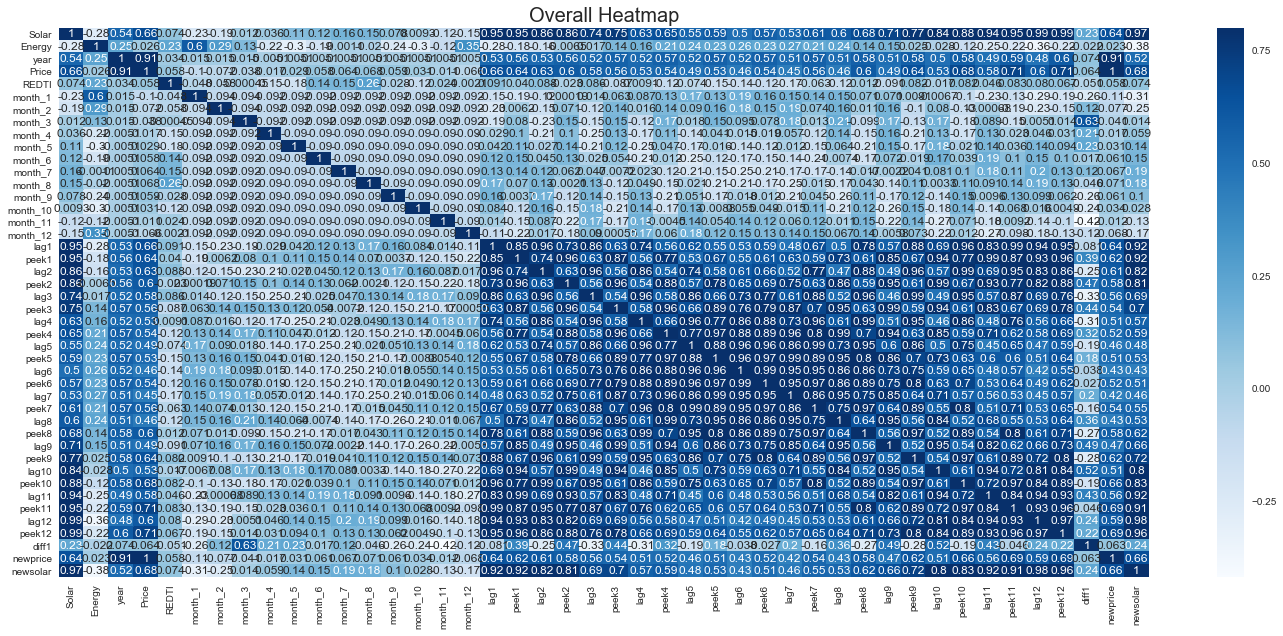

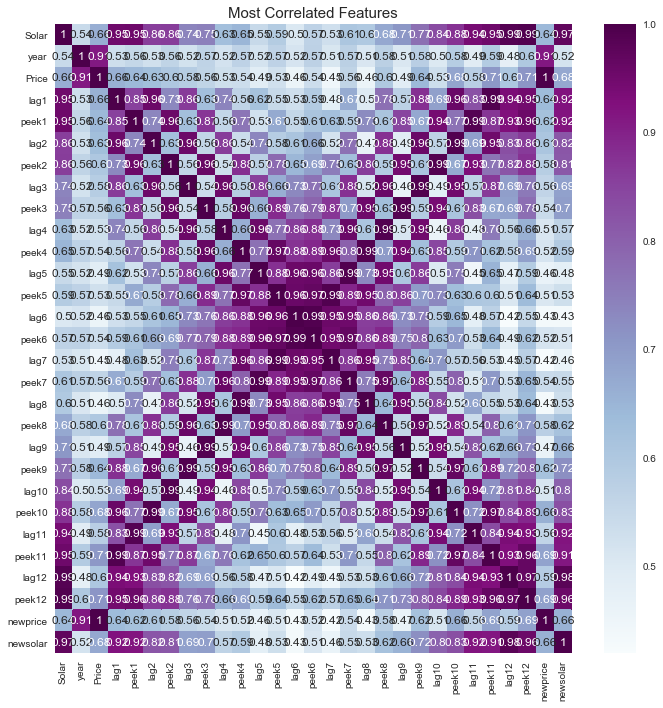

Most Correlated Features with Target Variable:

year
Price
lag1
peek1
lag2
peek2
lag3
peek3
lag4
peek4
lag5
peek5
lag6
peek6
lag7
peek7
lag8
peek8
lag9
peek9
lag10
peek10
lag11
peek11
lag12
peek12
newprice
newsolar


In [152]:
def FeatureCorrelation(data, feature):
    import seaborn as sb

    # Correlation Matrix
    CMtx = data.corr()
    plt.figure(5, figsize=(20, 9))
    sb.heatmap(CMtx, vmax=0.8, annot=True, cmap='Blues')  # Heatmap
    plt.title('Overall Heatmap', fontsize=20)
    # Save our graph 
    plt.savefig("../../images/overallcorrelationheat.png")
    plt.tight_layout()
    plt.show()

    # Most Correlated Features
    MCF = CMtx.index[abs(CMtx[feature]) > 0.5]  # Features that have a correlation greater than 0.5 with the Target Variable
    plt.figure(6, figsize=(10,10))
    sb.heatmap(data[MCF].corr(), annot=True, cmap='BuPu')
    plt.title('Most Correlated Features', fontsize=15)

    # Save our graph 
    plt.tight_layout()
    plt.savefig("../../images/correlationheat.png")
    plt.show()

    # Listing
    MCFL = list(MCF)
    MCFL.remove(feature)
    print('Most Correlated Features with Target Variable:\n')
    for name in MCFL:
       print(name)

FeatureCorrelation(data, 'Solar')



Scatter Plots


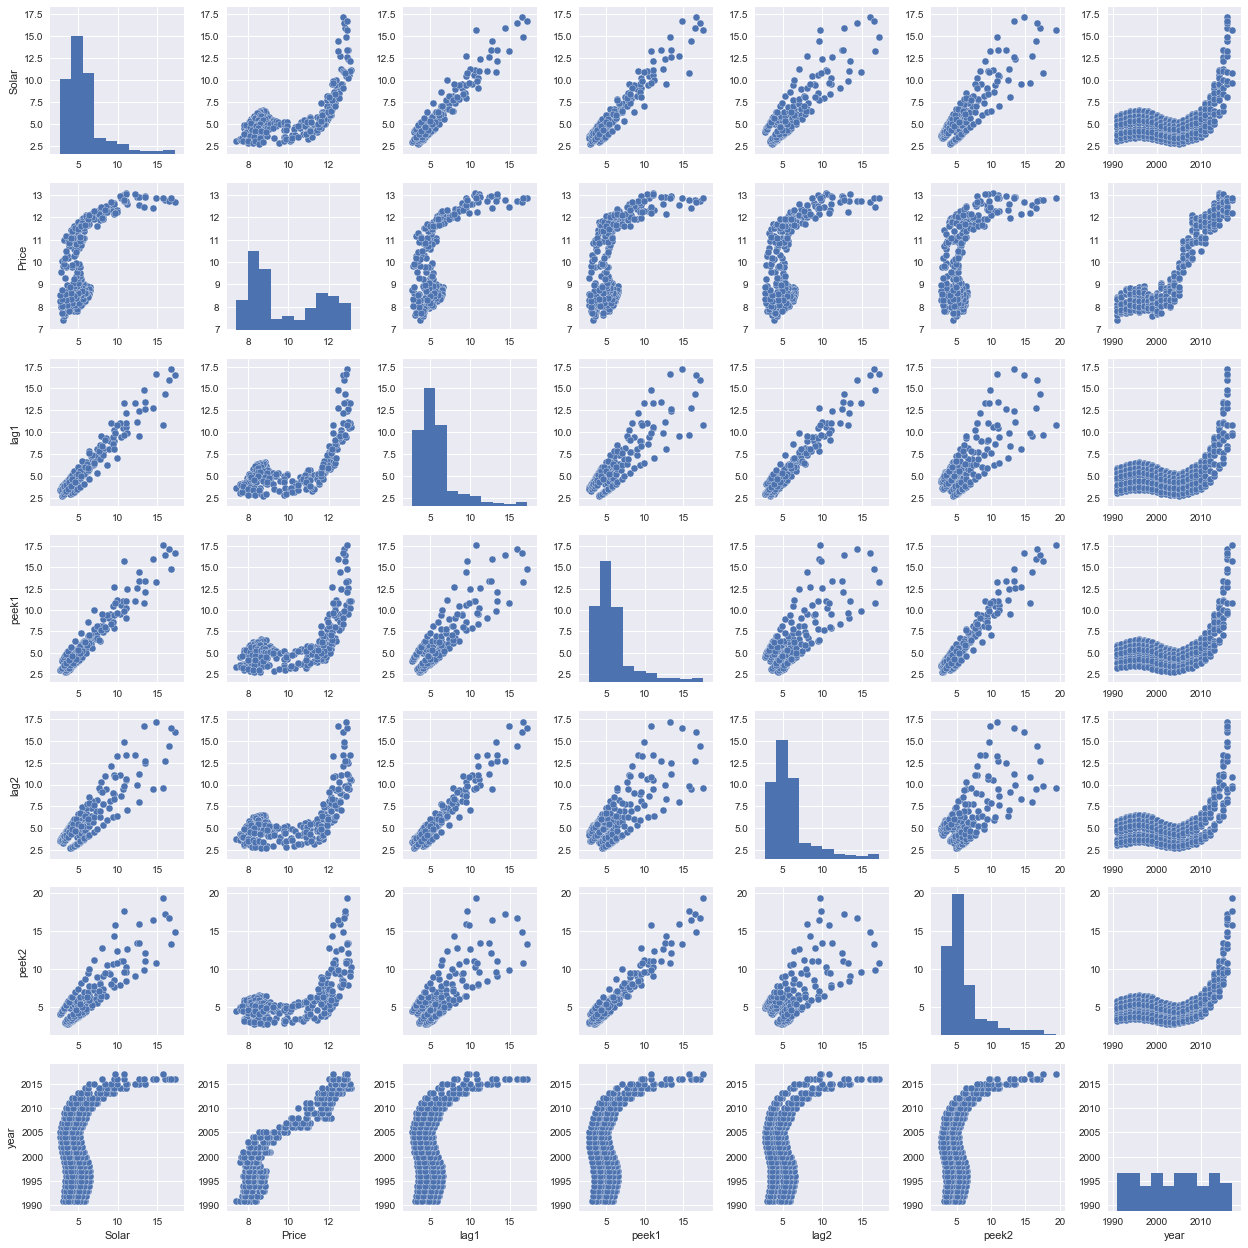

/anaconda3/envs/PythonData_3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


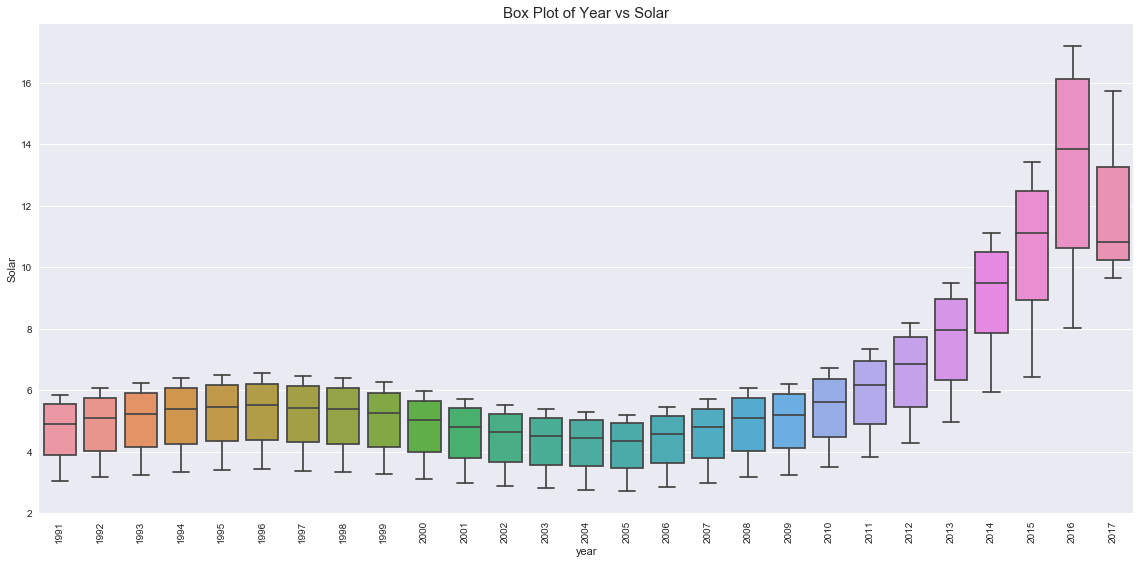

In [129]:
import seaborn as sb
# Scatter Plots between 'Solar' and Correlated Variables
print('\nScatter Plots')
sb.set()
CorF = ['Solar', 'Price', 'lag1', 'peek1', 'lag2', 'peek2', 'year']  # Partial correlated Features
sb.pairplot(data[CorF], size = 2.5)
# Save our graph 
plt.tight_layout()
plt.savefig("../../images/normalization.png")
plt.show()

# Box Plot between 'Year' and 'Solar'
plt.figure(8, figsize=(16, 8))
sb.boxplot(x=data['year'], y=data['Solar'])
plt.xticks(rotation=90)
plt.title('Box Plot of Year vs Solar', fontsize=15)
# Save our graph 
plt.tight_layout()
plt.savefig("../../images/boxplotyear.png")
plt.show()

## Closer look at the original dataset, by features to understand their distribution

We have support function to plot the distribution of a given feature

We plot for each original feature

In [130]:
# Stats for Feature Distribution
import scipy.stats as scst
import scipy.special as scsp
import seaborn as sb

def normalizing_feature(featurename):
    (mu, sigma) = scst.norm.fit(data[featurename])
    mu = round(mu,3)
    sigma = round(sigma,3)
    mode = data[featurename].mode().astype(int)
    print('\nmu(Mean):', mu)
    print('sigma(Standard Deviation):', sigma)
    print('Mode:', mode)

    # Skewness of Target Variable
    plt.figure(3)
    sb.distplot(data[featurename] , fit=scst.norm)
    plt.title(featurename + ' Distribution', fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.legend(['Normal Distribution($\mu=$%.3f, $\sigma=$%.3f)' % (mu,sigma)], loc='best')
    # Save our graph 
    plt.tight_layout()
    plt.savefig("../../images/Normalization_"+featurename+".png")
    plt.show()

    # Probability Plot(Similar to Quantile-Quantile Plot)
    plt.figure(4)
    scst.probplot(data[featurename], plot=plt)
    plt.show()

    # Skewness and Kurtosis
    print('Skewness: %.5f' % data[featurename].skew())
    print('Kurtosis: %.5f' % data[featurename].kurt())
                       


mu(Mean): 9.859
sigma(Standard Deviation): 1.747
Mode: 0     8
1     8
2     8
3    12
dtype: int64


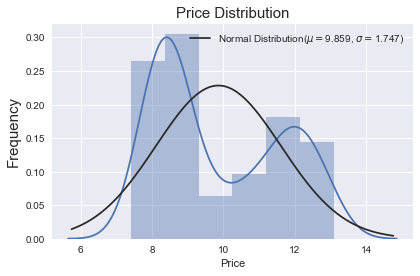

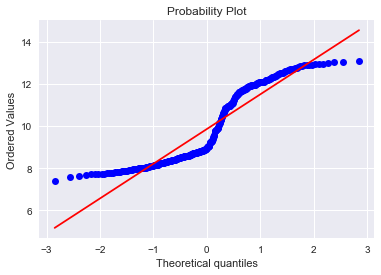

Skewness: 0.42155
Kurtosis: -1.41582


In [131]:
normalizing_feature('Price')



mu(Mean): 5.811
sigma(Standard Deviation): 2.537
Mode: 0    5
dtype: int64


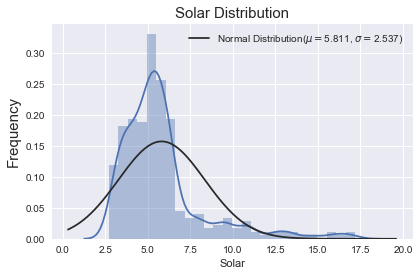

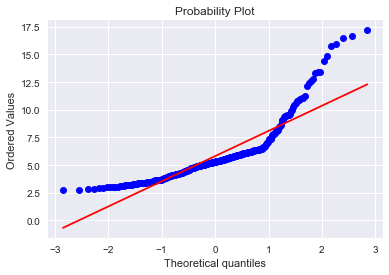

Skewness: 2.08255
Kurtosis: 5.13958


In [132]:
normalizing_feature('Solar')


mu(Mean): 5.773
sigma(Standard Deviation): 2.477
Mode: 0    5
dtype: int64


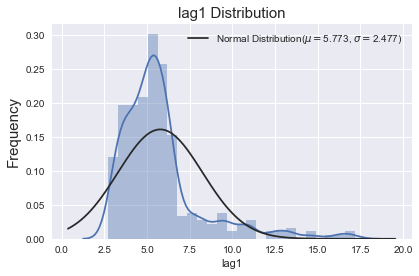

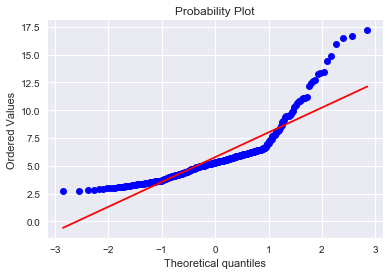

Skewness: 2.07614
Kurtosis: 5.25509


In [133]:
normalizing_feature('lag1')


mu(Mean): 5.857
sigma(Standard Deviation): 2.617
Mode: 0    5
dtype: int64


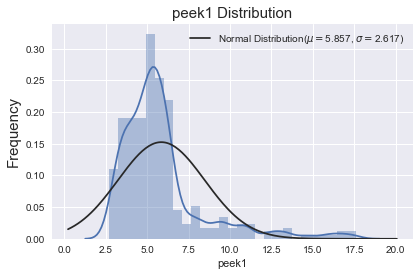

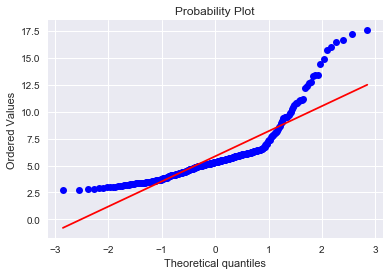

Skewness: 2.13738
Kurtosis: 5.34303


In [134]:
normalizing_feature('peek1')


mu(Mean): 5.751
sigma(Standard Deviation): 2.463
Mode: 0    5
dtype: int64


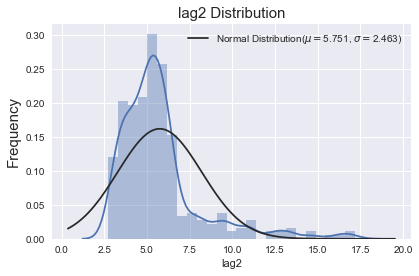

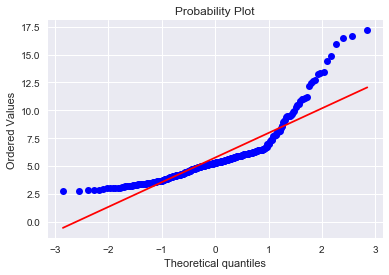

Skewness: 2.10995
Kurtosis: 5.46573


In [135]:
normalizing_feature('lag2')


mu(Mean): 5.908
sigma(Standard Deviation): 2.721
Mode: 0    5
dtype: int64


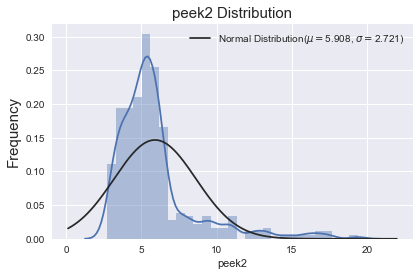

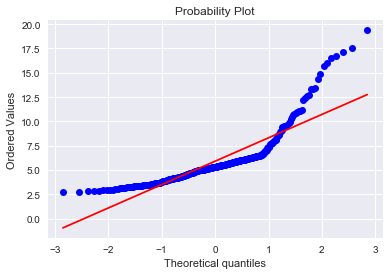

Skewness: 2.23838
Kurtosis: 5.92375


In [136]:
normalizing_feature('peek2')


mu(Mean): 5.958
sigma(Standard Deviation): 2.834
Mode: 0    5
dtype: int64


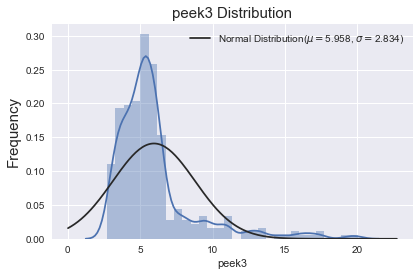

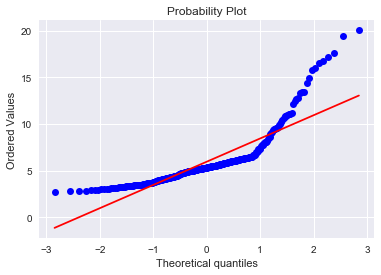

Skewness: 2.32524
Kurtosis: 6.40994


In [137]:
normalizing_feature('peek3')


mu(Mean): 6.163
sigma(Standard Deviation): 3.201
Mode: 0    5
dtype: int64


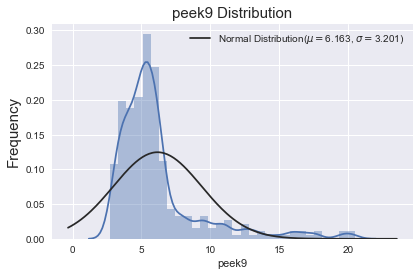

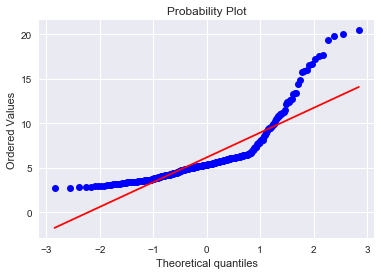

Skewness: 2.27329
Kurtosis: 5.62631


In [138]:
normalizing_feature('peek9')


mu(Mean): 5.535
sigma(Standard Deviation): 2.06
Mode: 0    5
dtype: int64


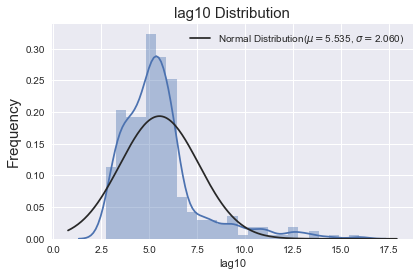

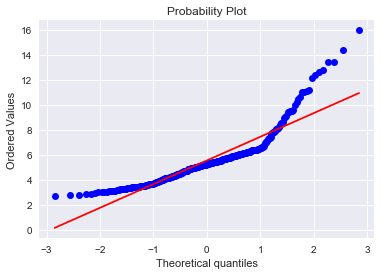

Skewness: 1.91502
Kurtosis: 5.01845


In [139]:
normalizing_feature('lag10')


mu(Mean): 6.186
sigma(Standard Deviation): 3.217
Mode: 0    5
dtype: int64


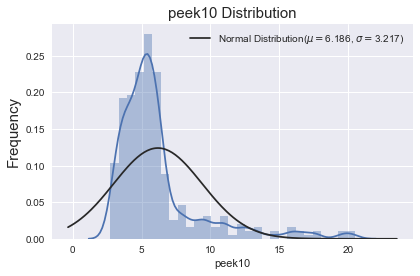

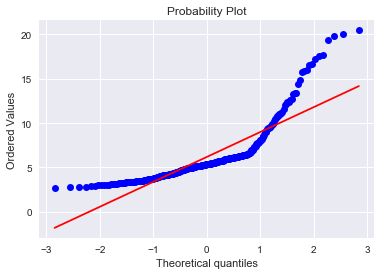

Skewness: 2.23763
Kurtosis: 5.42640


In [140]:
normalizing_feature('peek10')


mu(Mean): 5.495
sigma(Standard Deviation): 1.978
Mode: 0    5
dtype: int64


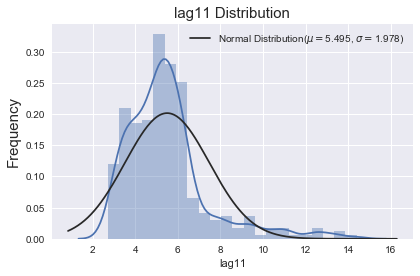

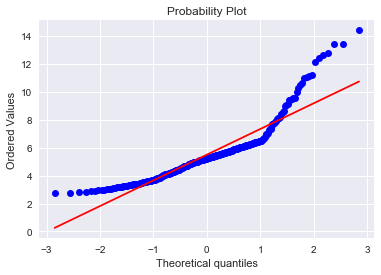

Skewness: 1.75058
Kurtosis: 4.08414


In [141]:
normalizing_feature('lag11')


mu(Mean): 6.215
sigma(Standard Deviation): 3.236
Mode: 0    5
dtype: int64


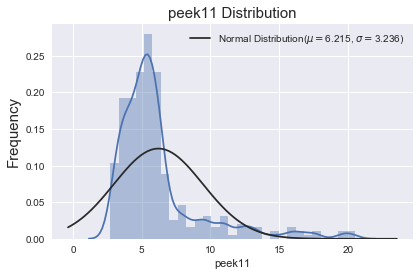

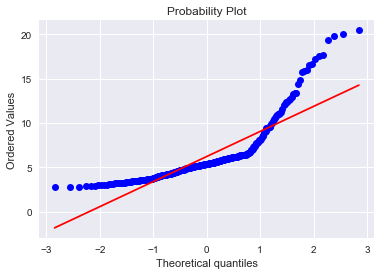

Skewness: 2.20028
Kurtosis: 5.20358


In [142]:
normalizing_feature('peek11')


mu(Mean): 5.459
sigma(Standard Deviation): 1.918
Mode: 0    5
dtype: int64


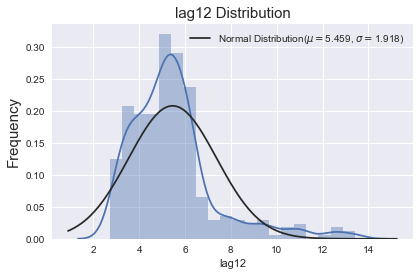

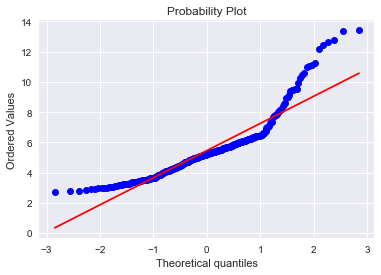

Skewness: 1.64965
Kurtosis: 3.64660


In [143]:
normalizing_feature('lag12')


mu(Mean): 6.26
sigma(Standard Deviation): 3.301
Mode: 0    5
dtype: int64


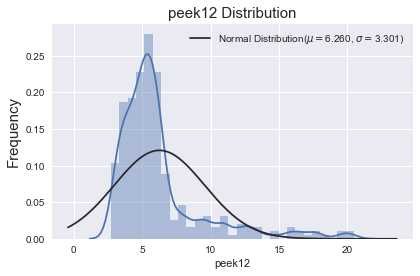

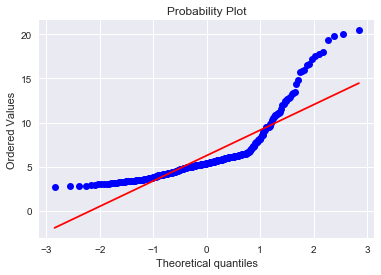

Skewness: 2.18016
Kurtosis: 4.98571


In [144]:
normalizing_feature('peek12')


mu(Mean): 2.372
sigma(Standard Deviation): 0.158
Mode: 0    2
1    2
2    2
3    2
dtype: int64


/anaconda3/envs/PythonData_3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


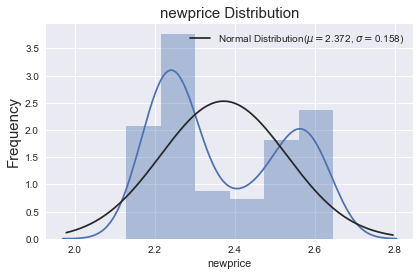

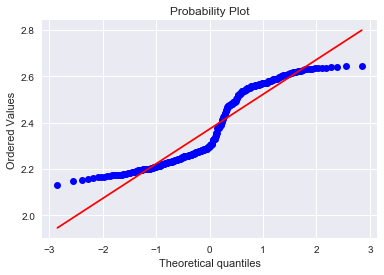

Skewness: 0.32430
Kurtosis: -1.48883


In [145]:
# Normalize 'Price'
data['newprice'] = np.log1p(data['Price'])
normalizing_feature('newprice')


mu(Mean): 1.865
sigma(Standard Deviation): 0.311
Mode: 0    1
dtype: int64


/anaconda3/envs/PythonData_3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


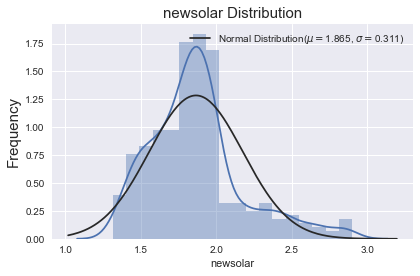

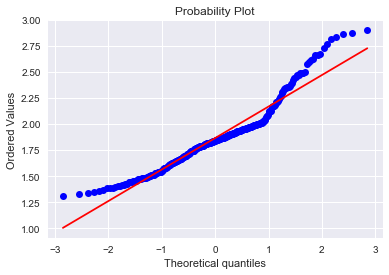

Skewness: 0.96711
Kurtosis: 1.22075


In [146]:
data['newsolar'] = np.log1p(data['Solar'])
normalizing_feature('newsolar')

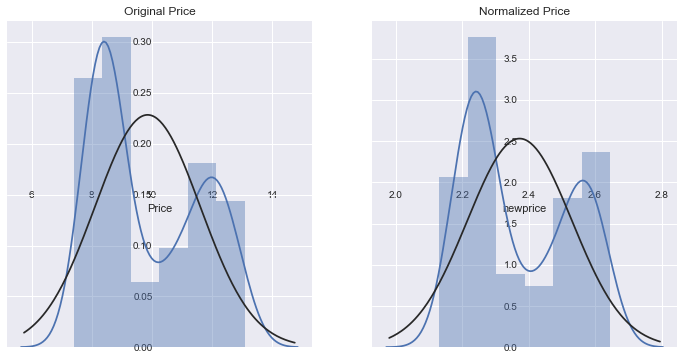

In [147]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Price")
axes2.set_title("Normalized Price")
#Price
# maxx = X_train["Price"].max()
# maxy = y_train.max()
# axes1.set_xlim(-maxx + 1, maxx + 1)
# axes1.set_ylim(-maxy + 1, maxy + 1)

# axes2.set_xlim(-2, 2)
# axes2.set_ylim(-2, 2)

plt.figure()

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

(mu, sigma) = scst.norm.fit(data['Price'])

sb.distplot(data['Price'] , fit=scst.norm, ax=axes1)



(mu, sigma) = scst.norm.fit(data['newprice'])

sb.distplot(data['newprice'] , fit=scst.norm, ax=axes2)

# Save our graph 
plt.tight_layout()
#plt.savefig("../../images/original_norm_Price.png")
figs = axes1.get_figure()
figs.savefig("../../images/original_norm_Price.png")
plt.show()


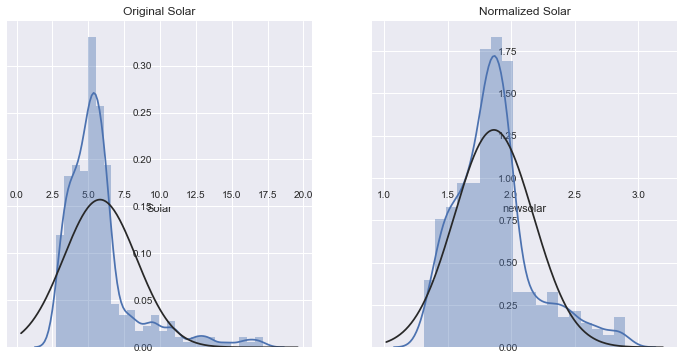

In [148]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Solar")
axes2.set_title("Normalized Solar")
#Price
# maxx = X_train["Price"].max()
# maxy = y_train.max()
# axes1.set_xlim(-maxx + 1, maxx + 1)
# axes1.set_ylim(-maxy + 1, maxy + 1)

# axes2.set_xlim(-2, 2)
# axes2.set_ylim(-2, 2)

plt.figure()

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

(mu, sigma) = scst.norm.fit(data['Solar'])

sb.distplot(data['Solar'] , fit=scst.norm, ax=axes1)



(mu, sigma) = scst.norm.fit(data['newsolar'])

snsplot = sb.distplot(data['newsolar'] , fit=scst.norm, ax=axes2)

# Save our graph 
plt.tight_layout()
#plt.savefig("../../images/original_norm_Solar.png")
figs = axes1.get_figure()
figs.savefig("../../images/original_norm_Solar.png")
plt.show()



mu(Mean): 41.135
sigma(Standard Deviation): 20.996
Mode: 0    0
dtype: int64


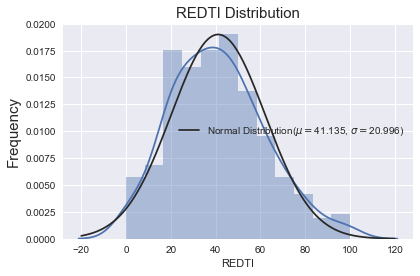

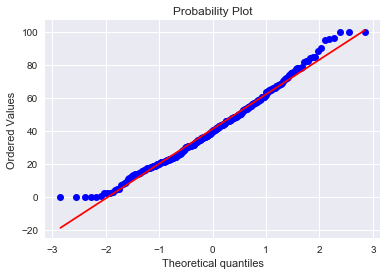

Skewness: 0.40195
Kurtosis: -0.06739


In [149]:
normalizing_feature('REDTI')

# Summary on feature distribution

* Solar: not normalized distribution
* Energy: not normalized distribution
* Price: binomial distribution
* REDTI: normal distribution but has a low correlation with other features

### We then proceed to attempt to fix the distribution by normalizing the above features


In [150]:
normalized_data = data.copy()

normalized_data['newenergy'] = np.log1p(data['Energy'])
normalized_data['newprice'] = np.log1p(data['Price'])
normalized_data['newsolar'] = np.log1p(data['Solar'])
# REDTI is a normal distribution already

normalized_data = normalized_data[["newsolar", "newenergy", "newprice", "year", "REDTI", "month_1", "month_2", "month_3", "month_4", 
                        "month_5", "month_6", "month_7", "month_8", "month_9", "month_10", "month_11", "month_12", 'lag1', 'peek1', 'lag2',
                        'peek2', 'lag3', 'peek3', 'lag4', 'peek4', 'lag5', 'peek5', 'lag6',
                        'peek6', 'lag7', 'peek7', 'lag8', 'peek8', 'lag9', 'peek9', 'lag10',
                        'peek10', 'lag11', 'peek11', 'lag12', 'peek12', 'diff1']]



### We verify if there are any changes in the correlation matrix on the newly normalized features

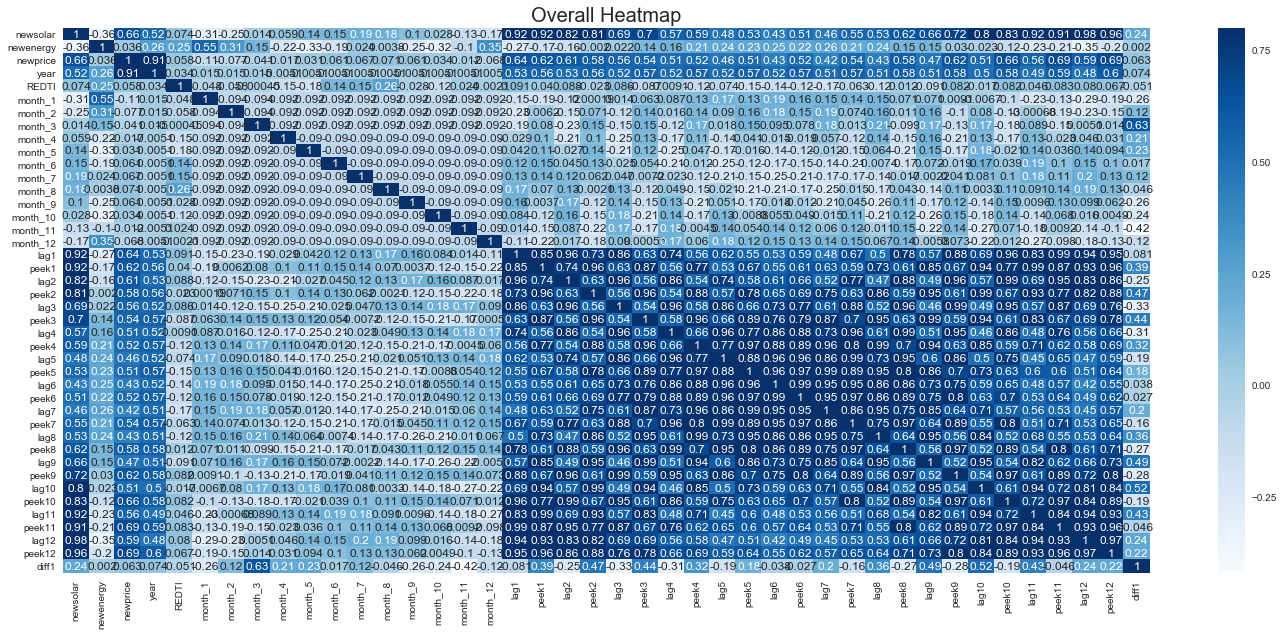

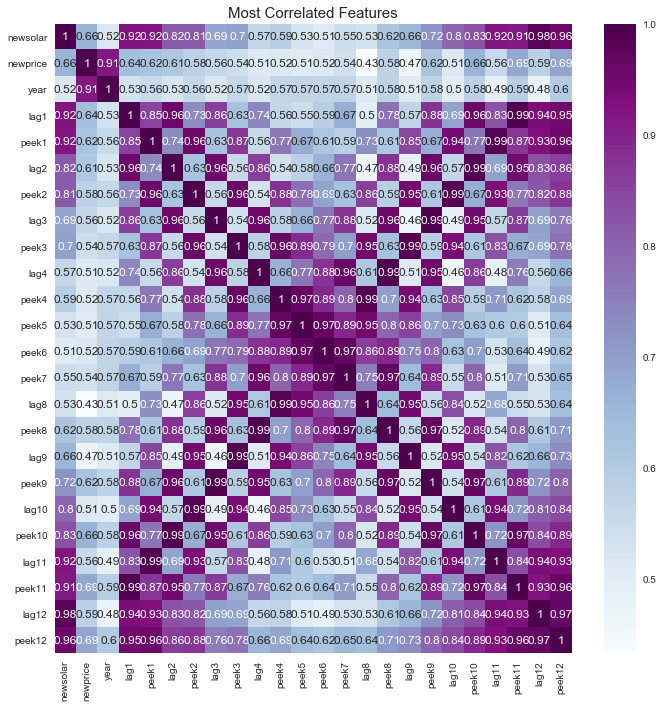

Most Correlated Features with Target Variable:

newprice
year
lag1
peek1
lag2
peek2
lag3
peek3
lag4
peek4
peek5
peek6
peek7
lag8
peek8
lag9
peek9
lag10
peek10
lag11
peek11
lag12
peek12


In [151]:
# Did feature correlation changed after normalization?
FeatureCorrelation(normalized_data, 'newsolar')

## No changes by creating the normalized version of the original features.  We reduce the dataset to the features with highest correlations


In [153]:
X = data[["year", "Price", "lag1", "peek1", "lag2", "peek2", "lag3", "peek3", 
         'lag4', 'peek4', 'lag5', 'peek5', 'lag6', 'peek6', 'lag7', 'peek7', 
          'lag8', 'peek8', 'lag9', 'peek9', 'lag10','peek10', 
          'lag11', 'peek11', 'lag12', 'peek12']]

X_predict = future[["year", "Price", "lag1", "peek1", "lag2", "peek2", "lag3", "peek3", 
         'lag4', 'peek4', 'lag5', 'peek5', 'lag6', 'peek6', 'lag7', 'peek7', 
          'lag8', 'peek8', 'lag9', 'peek9', 'lag10','peek10', 
          'lag11', 'peek11', 'lag12', 'peek12']]         

X_normalized = normalized_data[["year", "newprice", "lag1", "peek1", 
                                "lag2", "peek2", "lag3", "peek3", 
                                'lag4', 'peek4', 'peek5', 'peek6', 'peek7', 
                                'lag8', 'peek8', 'lag9', 'peek9', 'lag10','peek10', 
                                'lag11', 'peek11', 'lag12', 'peek12']]
y = data["Solar"]#.values.reshape(-1, 1)
y_normalized = normalized_data["newsolar"]#.values.reshape(-1, 1)

print("X and Y")
print(X.shape, y.shape)
print("Normalized X and Y")
print(X.shape, y_normalized.shape)
print("X for prediction")
print(X_predict.shape)

X and Y
(315, 26) (315,)
Normalized X and Y
(315, 26) (315,)
X for prediction
(12, 26)


In [155]:
OutX = os.path.join(output_data, "X.csv")
OutX_normalized = os.path.join(output_data, "X_normalized.csv")
Outy = os.path.join(output_data, "y.csv")
Outy_normalized = os.path.join(output_data, "y_normalized.csv")
OutX_p = os.path.join(output_data, "X_predict.csv")


X.to_csv(OutX, index=False)
X_normalized.to_csv(OutX_normalized, index=False)
y.to_csv(Outy, index=False, header=False)
y_normalized.to_csv(Outy_normalized, index=False)

X_predict.to_csv(OutX_p, index=False)

In [157]:
X_predict

,year,Price,lag1,peek1,lag2,peek2,lag3,peek3,lag4,peek4,...,lag8,peek8,lag9,peek9,lag10,peek10,lag11,peek11,lag12,peek12
327,2017,12.69,15.735,19.382,10.808,20.033,9.655,20.480,9.879,19.827,...,16.687,11.547,17.191,12.016,16.513,12.909,15.970,18.047,14.404,18.047
328,2017,13.01,17.576,20.033,15.735,20.480,10.808,19.827,9.655,17.733,...,14.864,12.016,16.687,12.909,17.191,18.047,16.513,18.047,15.970,18.047
329,2017,13.21,19.382,20.480,17.576,19.827,15.735,17.733,10.808,15.853,...,13.291,12.909,14.864,18.047,16.687,18.047,17.191,18.047,16.513,18.047
330,2017,13.11,20.033,19.827,19.382,17.733,17.576,15.853,15.735,12.413,...,10.851,18.047,13.291,18.047,14.864,18.047,16.687,18.047,17.191,18.047
331,2017,13.19,20.480,17.733,20.033,15.853,19.382,12.413,17.576,11.547,...,9.879,18.047,10.851,18.047,13.291,18.047,14.864,18.047,16.687,18.047
332,2017,13.30,19.827,15.853,20.480,12.413,20.033,11.547,19.382,12.016,...,9.655,18.047,9.879,18.047,10.851,18.047,13.291,18.047,14.864,18.047
333,2017,12.84,17.733,12.413,19.827,11.547,20.480,12.016,20.033,12.909,...,10.808,18.047,9.655,18.047,9.879,18.047,10.851,18.047,13.291,18.047
334,2017,12.97,15.853,11.547,17.733,12.016,19.827,12.909,20.480,18.047,...,15.735,18.047,10.808,18.047,9.655,18.047,9.879,18.047,10.851,18.047
335,2017,12.50,12.413,12.016,15.853,12.909,17.733,18.047,19.827,18.047,...,17.576,18.047,15.735,18.047,10.808,18.047,9.655,18.047,9.879,18.047
336,2018,12.23,11.547,12.909,12.413,18.047,15.853,18.047,17.733,18.047,...,19.382,18.047,17.576,18.047,15.735,18.047,10.808,18.047,9.655,18.047
